In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle as pkl
import os 

In [16]:
labels=[]
with open("labels_135.pickle","rb") as file:
    labels=pkl.load(file)

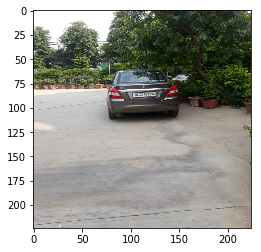

In [17]:
img=cv2.imread("../../illegal parking/images/IMG-20190708-WA0001.jpg")
img=cv2.resize(img,(224,224))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [31]:
#translation or cropping 1
def translation(img,coor):
    coor=np.array(coor)
    coor=coor.reshape((-1,4))
    img=cv2.resize(img,(224,224))
    rows,cols,_ = img.shape
    dst=img
    M = np.float32([[1,0,0],[0,1,50]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    M = np.float32([[1,0,0],[0,1,-50]])
    dst = cv2.warpAffine(dst,M,(cols,rows))
    dst=dst[50:-50,:,:]
    dst=cv2.resize(dst,(224,224))
#     p=np.array(cv2.transform(np.array(coor),M))
#     p=p.reshape((-1,4))
#     return p
    
#     coor=np.array([p[0][0],p[0][1]*224/124,p[1][0],p[1][1]*224/124])
#     print(coor)
    coor[:,1]=(coor[:,1]-50) * 224/ 124.0
    coor[:,3]=(coor[:,3]-50) * 224/ 124.0
    return dst,coor.reshape((-1,4))


In [30]:
# Rotation and Scaling 2 
def rotationScale(img,coor,angle=5,scale=1.1):
    coor=np.array(coor)
    coor=coor.reshape((-1,2,2))
    rows,cols,_ = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,scale)
    dst = cv2.warpAffine(img,M,(cols,rows))
    dst=cv2.resize(dst,(224,224))
    coor=np.array(cv2.transform(coor,M))
#     print(coor)
    return dst,coor.reshape((-1,4))

In [20]:
#FLIP 3
def flip(img,coor):
    coor=np.array(coor)
    coor=coor.reshape((-1,4))
    dst=cv2.flip(img,1)
    dst=cv2.resize(dst,(224,224))
#     print(coor)
    coor[:,0]=224-coor[:,0]
    coor[:,2]=224-coor[:,2]
    return dst,coor.reshape((-1,4))

In [23]:
def augmentation(labels):
    augment_labels=[]
    count=1
    for image in labels:
        img=cv2.imread("../../illegal parking/images/"+image[0])
        augs=[]
        augs.append(translation(img,image[1][1]))             #1
        augs.append(rotationScale(img,image[1][1]))           #2
        augs.append(rotationScale(img,image[1][1],angle=-7))  #3
        augs.append(rotationScale(img,image[1][1],angle=0))   #4
        augs.append(flip(img,image[1][1]))                    #5
        i=0
        for augim in augs:
            name=image[0].split(".")[0]+"_"+str(i+1)+".jpg"
            i+=1
            cv2.imwrite("../../illegal parking/images/"+name,augim[0])
            augment_labels.append((name,(image[1][0],augim[1],image[1][-1])))
        print(count,end=" ")
        count+=1
    return augment_labels

In [24]:
augment_labels=augmentation(labels=labels[:10])

1 2 3 4 5 6 7 8 9 10 

In [37]:
augment_labels

[('IMG-20190708-WA0000_1.jpg',
  (1,
   array([[ 79.79666 ,  36.796787, 112.98849 ,  79.03911 ]], dtype=float32),
   ['0'])),
 ('IMG-20190708-WA0000_2.jpg',
  (1,
   array([[ 7.6390533, 57.123943 , 46.25299  , 79.56646  ]], dtype=float32),
   ['0'])),
 ('IMG-20190708-WA0000_3.jpg',
  (1,
   array([[111.33471 , -11.722092, 144.43878 ,  18.258308]], dtype=float32),
   ['0'])),
 ('IMG-20190708-WA0000_4.jpg',
  (1,
   array([[49.07633 , 25.806618, 85.58734 , 51.529175]], dtype=float32),
   ['0'])),
 ('IMG-20190708-WA0000_5.jpg',
  (1,
   array([[144.20334,  70.36965, 111.01151,  93.75379]], dtype=float32),
   ['0'])),
 ('IMG-20190708-WA0001_1.jpg',
  (1,
   array([[ 74.28795 ,  19.176699, 152.8952  , 113.1534  ]], dtype=float32),
   ['0'])),
 ('IMG-20190708-WA0001_2.jpg',
  (1,
   array([[ 0.6674042, 46.963516 , 91.79384  , 96.43467  ]], dtype=float32),
   ['0'])),
 ('IMG-20190708-WA0001_3.jpg',
  (1,
   array([[106.62788, -23.10997, 185.47736,  44.22638]], dtype=float32),
   ['0'])),
 ('I

In [274]:
# augment_labels

In [392]:
# image=labels[2]
# img=cv2.imread("./Data/images/"+image[0])

# fig=plt.figure(figsize=(20,20))
# ax1=fig.add_subplot(1,3,1)
# im,coor=flip(img,image[1][1])
# for i in range(coor.shape[0]):
#     im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
# ax1.imshow(im)

# ax1=fig.add_subplot(1,3,2)
# im,coor=translation(img,image[1][1])
# for i in range(coor.shape[0]):
#     im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
# ax1.imshow(im)

# ax1=fig.add_subplot(1,3,3)
# im,coor=rotationScale(img,image[1][1])
# for i in range(coor.shape[0]):
#     im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
# ax1.imshow(im)

[[-13.93544   97.64771   65.28725  163.74669 ]
 [ 53.4448    84.986275 141.14838  117.78701 ]
 [189.54562   65.43345  210.49675   83.59516 ]
 [208.47275   62.310555 229.38231   83.555916]]
[array([ -0.9139395,  89.02394  ,  65.59544  , 155.1623   ], dtype=float32), array([ 61.11093,  82.89605, 137.93918, 119.5504 ], dtype=float32), array([185.91736 ,  75.972   , 203.45236 ,  94.079834], dtype=float32), array([203.3058  ,  74.643456, 220.55884 ,  95.540634], dtype=float32)]


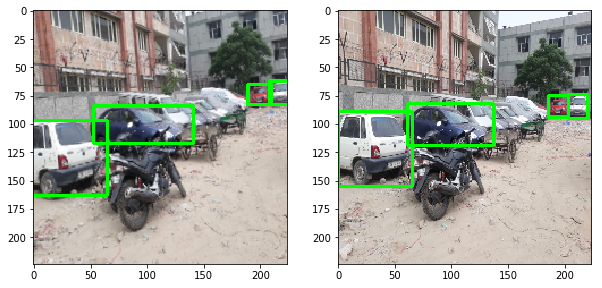

In [38]:
a=np.random.randint(0,135)
image=labels[a]
# print(image)
img=cv2.resize(cv2.imread("../../illegal parking/images/"+image[0]),(224,224))
# p=translation(img,image[1][1])
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im,coor=rotationScale(img,image[1][1])
print(coor)
print(image[1][1])
for i in range(coor.shape[0]):
    im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
    img=cv2.rectangle(img,(int(image[1][1][i][0]),int(image[1][1][i][1])),(int(image[1][1][i][2]),int(image[1][1][i][3])),(0,255,0),2)
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.imshow(im)
ax2.imshow(img)

In [39]:
coor[:,1],coor

(array([97.64771 , 84.986275, 65.43345 , 62.310555], dtype=float32),
 array([[-13.93544 ,  97.64771 ,  65.28725 , 163.74669 ],
        [ 53.4448  ,  84.986275, 141.14838 , 117.78701 ],
        [189.54562 ,  65.43345 , 210.49675 ,  83.59516 ],
        [208.47275 ,  62.310555, 229.38231 ,  83.555916]], dtype=float32))

In [41]:
import pickle as pkl

In [46]:
with open("labels_135.pickle", "rb") as file:
    data1 = pkl.load(file)

In [47]:
with open("labels_nxt45.pickle", "rb") as file1:
    data2 = pkl.load(file1)

In [63]:
data1[0][1]

(1,
 [array([ 79.79666,  70.36965, 112.98849,  93.75379], dtype=float32)],
 ['0'])

In [75]:
data3 = data1+data2

In [93]:
data1[1][1]

(1,
 [array([ 74.28795 ,  60.615673, 152.8952  , 112.63849 ], dtype=float32)],
 ['0'])

In [106]:
len(data2)

45

In [107]:
data2

[('IMG-20190710-WA0057.jpg',
  1,
  [array([ 67.2022 ,  90.92306, 103.33155, 144.14516], dtype=float32)],
  [0]),
 ('IMG-20190710-WA0061.jpg',
  1,
  [array([ 67.20883,  89.92501, 106.00513, 142.24886], dtype=float32)],
  [0]),
 ('IMG20190710145707.jpg',
  1,
  [array([  7.6653757,  63.416336 , 150.92868  , 121.947495 ], dtype=float32)],
  [0]),
 ('IMG20190710145718.jpg',
  1,
  [array([  9.344733,  60.653152, 206.6098  , 143.36125 ], dtype=float32)],
  [0]),
 ('IMG20190710150015.jpg',
  1,
  [array([ 92.61108, 107.24855, 128.98386, 134.30402], dtype=float32)],
  [0]),
 ('IMG20190710150250.jpg',
  1,
  [array([ 48.39882,  84.3741 , 202.92958, 131.528  ], dtype=float32)],
  [0]),
 ('IMG20190710150306.jpg',
  1,
  [array([ 83.601   ,  70.047195, 222.93327 , 129.08649 ], dtype=float32)],
  [0]),
 ('IMG20190710150312.jpg',
  2,
  [array([  2.3112378,  82.39559  , 112.82767  , 120.78282  ], dtype=float32),
   array([111.248985,  82.62121 , 225.79684 , 134.43681 ], dtype=float32)],
  [0, 0])

In [113]:
for i in range(len(data2)):
    data2[i] = (data2[i][0],(data2[i][1],data2[i][2],data2[i][3]))

In [115]:
data2[0]

('IMG-20190710-WA0057.jpg',
 (1,
  [array([ 67.2022 ,  90.92306, 103.33155, 144.14516], dtype=float32)],
  [0]))

In [117]:
data3 = data1+data2

In [118]:
data3

[('IMG-20190708-WA0000.jpg',
  (1,
   [array([ 79.79666,  70.36965, 112.98849,  93.75379], dtype=float32)],
   ['0'])),
 ('IMG-20190708-WA0001.jpg',
  (1,
   [array([ 74.28795 ,  60.615673, 152.8952  , 112.63849 ], dtype=float32)],
   ['0'])),
 ('IMG-20190708-WA0002.jpg',
  (2,
   [array([ 10.023691,  40.63152 , 119.167854, 111.11149 ], dtype=float32),
    array([115.88924 ,  47.62655 , 166.64946 ,  78.252716], dtype=float32)],
   ['0', '0'])),
 ('IMG-20190708-WA0003.jpg',
  (1,
   [array([ 73.44276,  67.08486, 134.48557, 104.07268], dtype=float32)],
   ['0'])),
 ('IMG-20190708-WA0004.jpg',
  (1,
   [array([115.3506  ,  85.271576, 188.15633 , 124.81831 ], dtype=float32)],
   ['1'])),
 ('IMG-20190708-WA0005.jpg',
  (2,
   [array([ -0.5452328,  57.071198 ,  84.31593  , 118.04035  ], dtype=float32),
    array([ 70.0764  ,  50.369156, 220.82559 , 132.36383 ], dtype=float32)],
   ['0', '0'])),
 ('IMG-20190708-WA0006.jpg',
  (1,
   [array([ 74.84013,  82.68138, 153.49147, 130.48189], dtype=f

In [120]:
with open("labels", "wb") as file:
    pkl.dump(data3,file)

In [121]:
with open("labels", "rb") as file:
    data = pkl.load(file)

In [122]:
data

[('IMG-20190708-WA0000.jpg',
  (1,
   [array([ 79.79666,  70.36965, 112.98849,  93.75379], dtype=float32)],
   ['0'])),
 ('IMG-20190708-WA0001.jpg',
  (1,
   [array([ 74.28795 ,  60.615673, 152.8952  , 112.63849 ], dtype=float32)],
   ['0'])),
 ('IMG-20190708-WA0002.jpg',
  (2,
   [array([ 10.023691,  40.63152 , 119.167854, 111.11149 ], dtype=float32),
    array([115.88924 ,  47.62655 , 166.64946 ,  78.252716], dtype=float32)],
   ['0', '0'])),
 ('IMG-20190708-WA0003.jpg',
  (1,
   [array([ 73.44276,  67.08486, 134.48557, 104.07268], dtype=float32)],
   ['0'])),
 ('IMG-20190708-WA0004.jpg',
  (1,
   [array([115.3506  ,  85.271576, 188.15633 , 124.81831 ], dtype=float32)],
   ['1'])),
 ('IMG-20190708-WA0005.jpg',
  (2,
   [array([ -0.5452328,  57.071198 ,  84.31593  , 118.04035  ], dtype=float32),
    array([ 70.0764  ,  50.369156, 220.82559 , 132.36383 ], dtype=float32)],
   ['0', '0'])),
 ('IMG-20190708-WA0006.jpg',
  (1,
   [array([ 74.84013,  82.68138, 153.49147, 130.48189], dtype=f

In [318]:
p[:][1]

array([112.98849,  43.75379], dtype=float32)